## Problem 1: Signal

### Import libraries and load data

In [691]:
## Importing the necessary libraries along with the standard import

import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import warnings
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [692]:
## Let us check the version of the various libraries
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Tensorflow version:',tf.__version__)

Numpy version: 1.24.3
Pandas version: 2.0.3
Tensorflow version: 2.14.0


# Data Ingestion:

# Q 1. 1 a -Read the ‘Signals.csv’ as DataFrame and import required libraries.


In [693]:
## Loading the dataset

df = pd.read_csv('NN Project Data - Signal.csv')

In [694]:
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [695]:
df.tail()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### EDA

In [696]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB



#### Shape

In [697]:
print('The number of rows are {} and the columns are {}'.format(df.shape[0],df.shape[1]))

The number of rows are 1599 and the columns are 12


In [698]:
print('The total number of elements of the dataset are: ')
df.size

The total number of elements of the dataset are: 


19188

In [699]:
# The statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# Q 1.1 b - Check for missing values and print percentage for each attribute.


In [700]:
# Are there any missing values ?
df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

* ### There are no missing values in the dataset

In [701]:
missing_values = df.isna().sum()
total_values = df.shape[0]
percentage_missing = (missing_values / total_values) * 100

In [702]:
print(percentage_missing)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


# Q1.1 c - Check for presence of duplicate records in the dataset and impute with appropriate method.
 


### Checking for duplicate records

In [703]:
df.duplicated().sum()

240

There are 240 duplicate records

In [704]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 240


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [705]:
duplicate_rows = df[df.duplicated(keep='first')]
print(df)

      Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0             7.4        0.700         0.00          1.9        0.076   
1             7.8        0.880         0.00          2.6        0.098   
2             7.8        0.760         0.04          2.3        0.092   
3            11.2        0.280         0.56          1.9        0.075   
4             7.4        0.700         0.00          1.9        0.076   
...           ...          ...          ...          ...          ...   
1594          6.2        0.600         0.08          2.0        0.090   
1595          5.9        0.550         0.10          2.2        0.062   
1596          6.3        0.510         0.13          2.3        0.076   
1597          5.9        0.645         0.12          2.0        0.075   
1598          6.0        0.310         0.47          3.6        0.067   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0            11.0         34.0      0.99780      

### Since there are just 240 duplicates out of 1599 rows we can avoid them as they are affecting the datatset

# Q 1.1 d- Visualise distribution of the target variable.
 


### Univariate Analysis

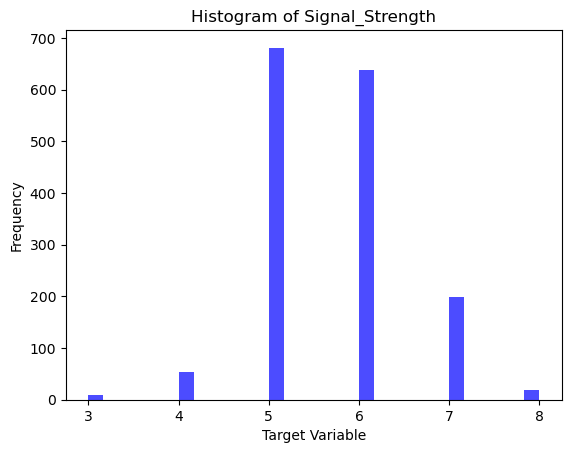

In [706]:
# Histogram
plt.hist(df['Signal_Strength'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Signal_Strength')
plt.show()

Signal_Strength
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

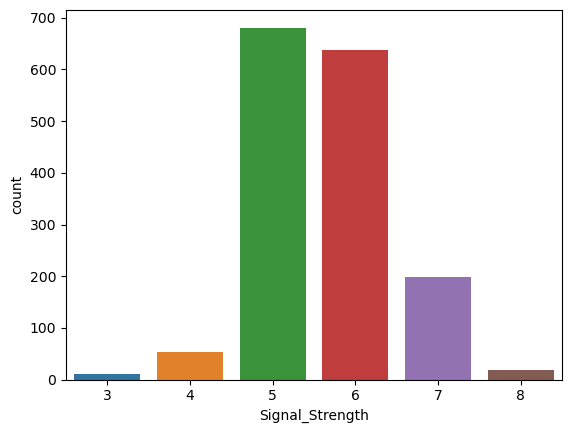

In [707]:
# Countplot
sns.countplot(x='Signal_Strength', data=df);
df['Signal_Strength'].value_counts()

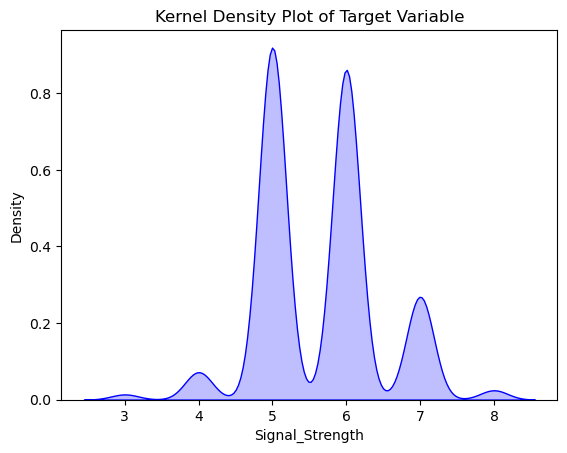

In [708]:
sns.kdeplot(df['Signal_Strength'], shade=True, color='blue')
plt.xlabel('Signal_Strength')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Target Variable')
plt.show()

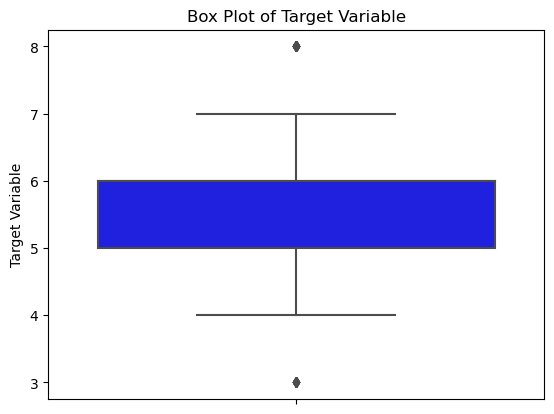

In [709]:
# Boxplot
sns.boxplot(y=df['Signal_Strength'], color='blue')
plt.ylabel('Target Variable')
plt.title('Box Plot of Target Variable')
plt.show()

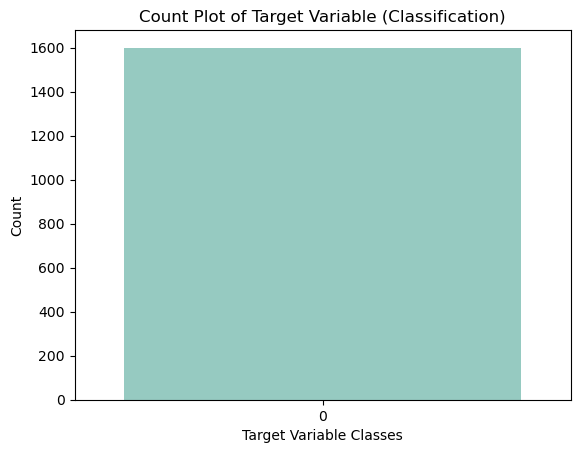

In [710]:
#Count Plot
sns.countplot(df['Signal_Strength'], palette='Set3')
plt.xlabel('Target Variable Classes')
plt.ylabel('Count')
plt.title('Count Plot of Target Variable (Classification)')
plt.show()

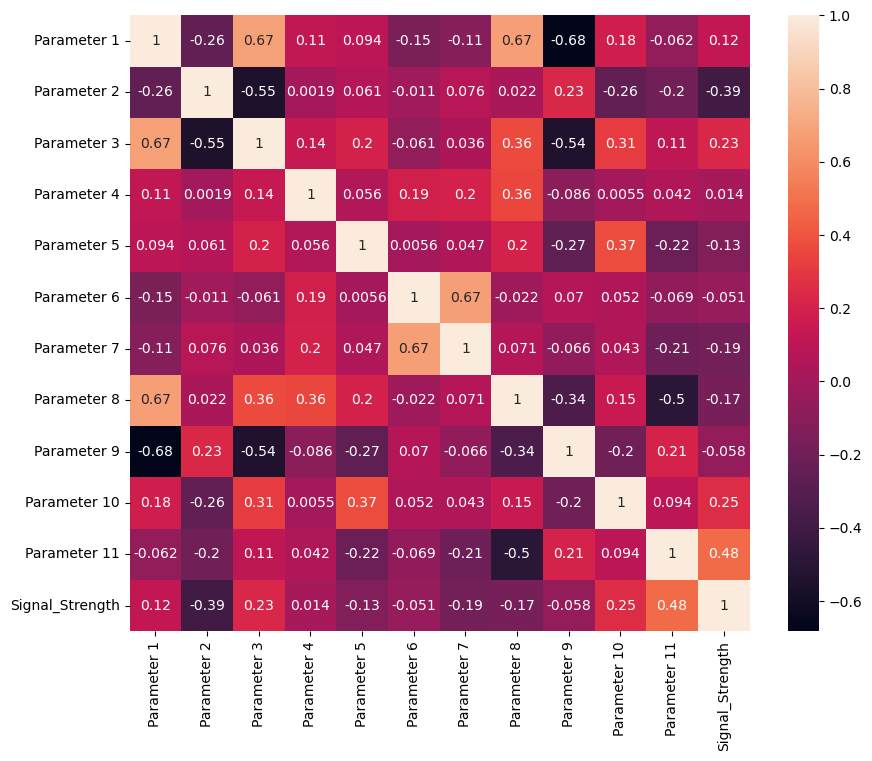

In [711]:
#Corelation plot
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

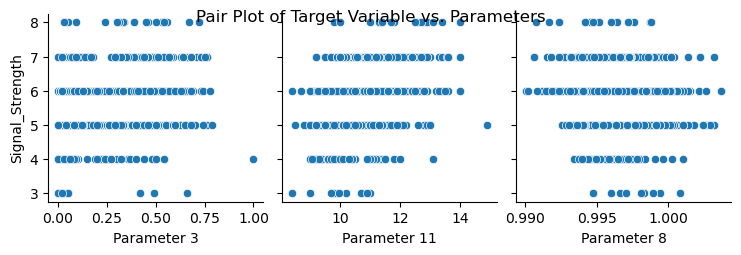

In [712]:
# Pairplot
sns.pairplot(df, y_vars=['Signal_Strength'], x_vars=['Parameter 3', 'Parameter 11', 'Parameter 8'])
plt.suptitle('Pair Plot of Target Variable vs. Parameters')
plt.show()

Signal_Strength
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

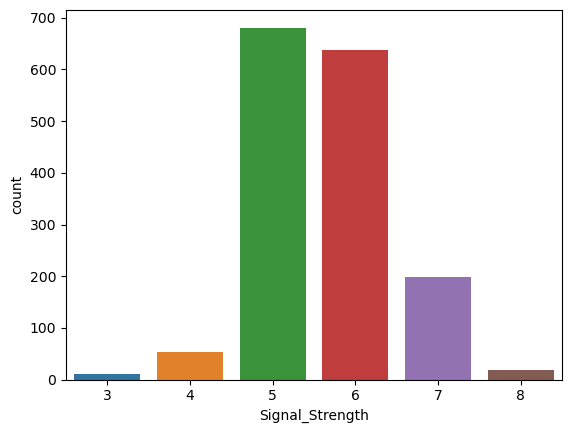

In [713]:
sns.countplot(x='Signal_Strength', data=df);
df['Signal_Strength'].value_counts()

In [714]:
df.skew()

Parameter 1        0.982751
Parameter 2        0.671593
Parameter 3        0.318337
Parameter 4        4.540655
Parameter 5        5.680347
Parameter 6        1.250567
Parameter 7        1.515531
Parameter 8        0.071288
Parameter 9        0.193683
Parameter 10       2.428672
Parameter 11       0.860829
Signal_Strength    0.217802
dtype: float64

###  Q 1.1 e- - Share insights from the initial data analysis 
 


### The total number of elements are 19188 and the number of rows are 1599 and the columns are 12. There are no missing values, there are 240 duplicate in dataset. There are 10 float and 1 int variables. Signal_Strength is the target variable.
### The analysis are as follows:-
    1) There are 681 values with Signal_Strength as 5 followed by 6 with 638 followed by 7 as 199.
    2) Parameter 3 and Parameter 1 are possitively correlated and Parameter 11 is possitively correlated with Signal_Strength. 

# Q 1.2 a - Split the data into X & Y..
 


# Data Preparation:

In [715]:
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [716]:
## Separating Independent and Dependent Columns
X = df.drop(['Signal_Strength'],axis=1)
Y = df[['Signal_Strength']]

In [717]:
X.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [718]:
Y.head()

,Signal_Strength
0,5
1,5
2,5
3,6
4,5


# Q 1.2 b - Split the data into train & test with 70:30 proportion.
 


### Train-Test Split

In [719]:
# Splitting the dataset into the Training and Testing set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42,stratify = Y)

In [720]:
X_train.isnull().sum()

Parameter 1     0
Parameter 2     0
Parameter 3     0
Parameter 4     0
Parameter 5     0
Parameter 6     0
Parameter 7     0
Parameter 8     0
Parameter 9     0
Parameter 10    0
Parameter 11    0
dtype: int64

### Q 1.2 c - Print shape of all the 4 variables and verify if train and test data is in sync.
 


In [721]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (1119, 11)
Y_train shape: (1119, 1)
X_test shape: (480, 11)
Y_test shape: (480, 1)


# Q 1.2 d - Normalise the train and test data with appropriate method..


In [722]:
#We can see that Independent variables has continuous values so we can go with Z-score standardization

# Z-score Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Q 1.2 e - Transform Labels into format acceptable by Neural Network
 


In [723]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train - 3, num_classes=6)
Y_test = to_categorical(Y_test - 3, num_classes=6)


# Q1.3 a - Design a Neural Network to train a classifier.

In [724]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=11, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))  # Output layer with 6 classes


# Q  1.3 b Train the classifier using the previously designed architecture:

In [725]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose = 1, validation_data=(X_test, Y_test))

Epoch 1/50
35/35 [==============================] - 1s 10ms/step - loss: 1.5570 - accuracy: 0.3512 - val_loss: 1.2368 - val_accuracy: 0.5312
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 1.1560 - accuracy: 0.5416 - val_loss: 1.0686 - val_accuracy: 0.5583
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 1.0502 - accuracy: 0.5719 - val_loss: 1.0125 - val_accuracy: 0.5688
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 1.0063 - accuracy: 0.5898 - val_loss: 0.9899 - val_accuracy: 0.5813
Epoch 5/50
35/35 [==============================] - 0s 4ms/step - loss: 0.9828 - accuracy: 0.5979 - val_loss: 0.9715 - val_accuracy: 0.5958
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 0.9589 - accuracy: 0.6095 - val_loss: 0.9609 - val_accuracy: 0.6000
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 0.9407 - accuracy: 0.6273 - val_loss: 0.9580 - val_accuracy: 0.6104
Epoch 8/50
35/35 [=

# Q 1.3 c - Plot 2 separate visuals.  
                 i) Training Loss and Validation Loss 
                 ii) Training Accuracy and Validation Accuracy

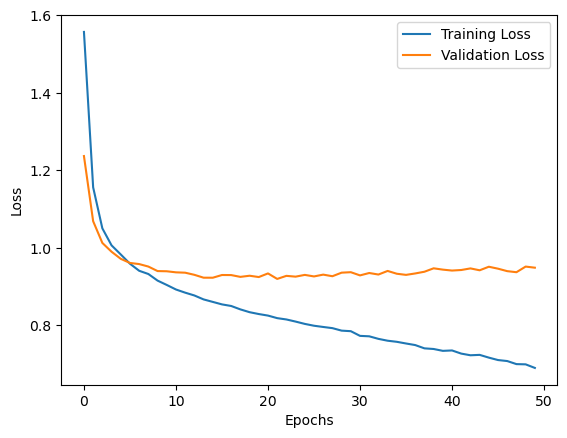

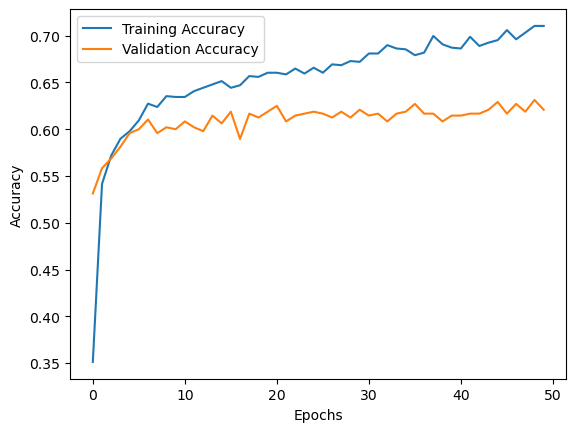

In [726]:
# Visualize Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Q 1.3 d Design a new architecture/update the existing architecture to improve model performance.

In [727]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Create a new model
new_model = Sequential()
new_model.add(Dense(128, input_dim=11, activation='relu'))
new_model.add(Dropout(0.5))  # Add dropout to prevent overfitting
new_model.add(Dense(64, activation='relu'))
new_model.add(Dense(32, activation='relu'))
new_model.add(Dense(6, activation='softmax'))

# Compile and train the new model
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
new_history = new_model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/50
35/35 [==============================] - 1s 9ms/step - loss: 1.3014 - accuracy: 0.4656 - val_loss: 1.0994 - val_accuracy: 0.5188
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 1.1014 - accuracy: 0.5576 - val_loss: 1.0259 - val_accuracy: 0.5583
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 1.0541 - accuracy: 0.5782 - val_loss: 0.9885 - val_accuracy: 0.5875
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 1.0257 - accuracy: 0.5916 - val_loss: 0.9748 - val_accuracy: 0.5854
Epoch 5/50
35/35 [==============================] - 0s 4ms/step - loss: 1.0170 - accuracy: 0.5791 - val_loss: 0.9609 - val_accuracy: 0.5854
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 0.9867 - accuracy: 0.5898 - val_loss: 0.9549 - val_accuracy: 0.6000
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 0.9733 - accuracy: 0.6077 - val_loss: 0.9454 - val_accuracy: 0.6000
Epoch 8/50
35/35 [==

# Q 1.3 e - Plot visuals as in Q3.C and share insights about difference observed in both the models. 


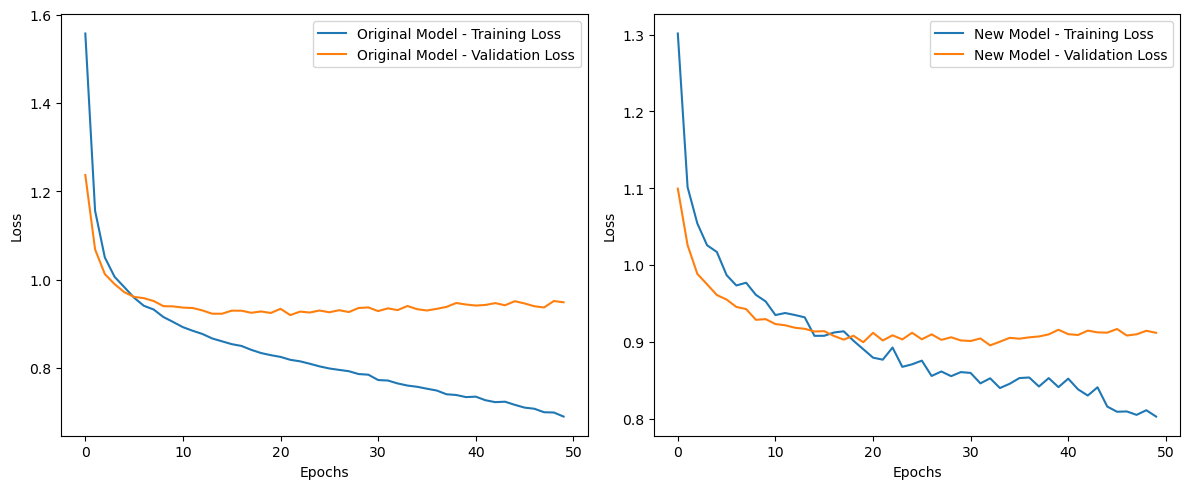

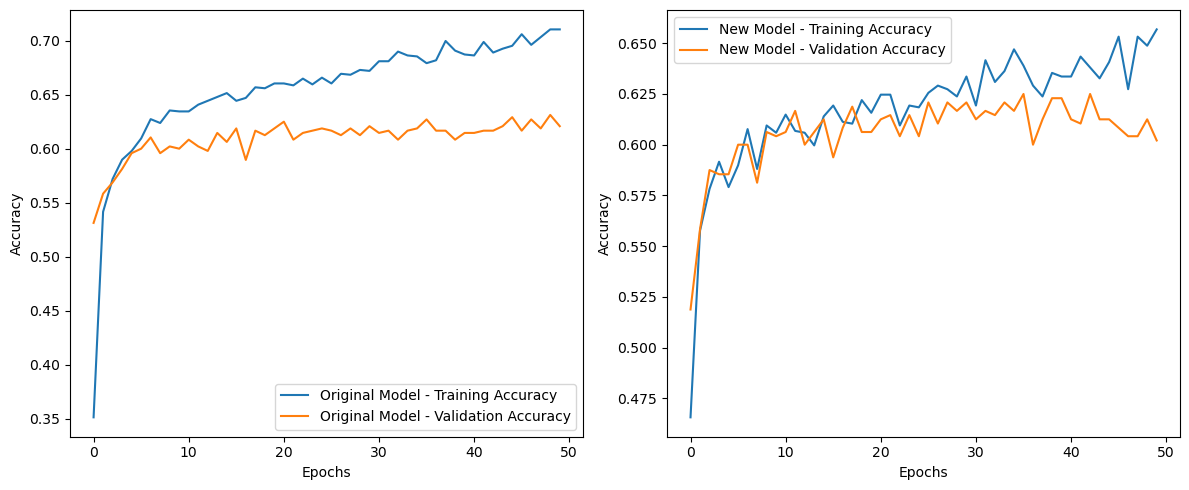

In [728]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss for the original model and the new model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Original Model - Training Loss')
plt.plot(history.history['val_loss'], label='Original Model - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(new_history.history['loss'], label='New Model - Training Loss')
plt.plot(new_history.history['val_loss'], label='New Model - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot Training and Validation Accuracy for the original model and the new model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Original Model - Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Original Model - Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(new_history.history['accuracy'], label='New Model - Training Accuracy')
plt.plot(new_history.history['val_accuracy'], label='New Model - Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Insights:

1) Model 2 appears to be more robust and effective than Model 1 because it manages to reduce overfitting and has a smaller gap between training and validation metrics.


2) The inclusion of dropout layers in Model 2 helps regularize the network, making it a better choice to prevent overfitting compared to Model 1.


3) Model 2 demonstrates better generalization to unseen data as indicated by the smaller gap between training and validation metrics, whereas Model 1 appears to be overfitting.


4) To improve Model 1, we might consider adding regularization techniques like dropout or reducing the model's complexity.


In summary, Model 2, with its additional complexity and dropout layers, shows better performance and generalization capability compared to Model 1, which experiences overfitting. It's a good example of how the architecture and regularization techniques can significantly impact the performance of neural networks.


# Project 2

# Q 2.1 a - Read the .h5 file and assign to a variable.
 


In [729]:
import h5py

file_path = 'https://www.christopherlovell.co.uk/blog/2016/04/27/h5py-intro.html#:~:text=Reading%20HDF5%20files,method%20in%20read%20mode%2C%20r.&text=To%20see%20what%20data%20is,method%20on%20the%20file%20object.&text=We%20can%20then%20grab%20each,get%20method%2C%20specifying%20the%20name.&text=This%20returns%20a%20HDF5%20dataset%20object.'

In [730]:
#Open the file as readonly and assign the variable
hdf_df = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5','r')

# Q2.1 b - Print all the keys from the .h5 file.
 


In [731]:
hdf_df.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

# Q  2.1 c - Split the data into X_train, X_test, Y_train, Y_test


In [732]:
#Load the training, testing, and validation data
X_train = hdf_df['X_train']
X_test = hdf_df['X_test']
X_val = hdf_df['X_val']
y_train = hdf_df['y_train']
y_test = hdf_df['y_test']
y_val = hdf_df['y_val']

# Q  2.2 a - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync..
 


In [733]:
print('The shape of the training dataset:', X_train.shape)
print('The shape of the training (y) dataset:', y_train.shape)
print('The shape of the validation dataset:', X_val.shape)
print('The shape of the validation (y) dataset:', y_val.shape)
print('The shape of the test dataset:', X_test.shape)
print('The shape of the test (y) dataset:', y_test.shape)

The shape of the training dataset: (42000, 32, 32)
The shape of the training (y) dataset: (42000,)
The shape of the validation dataset: (60000, 32, 32)
The shape of the validation (y) dataset: (60000,)
The shape of the test dataset: (18000, 32, 32)
The shape of the test (y) dataset: (18000,)


# Q  2.2 b - Visualise first 10 images in train data and print its corresponding labels..
 


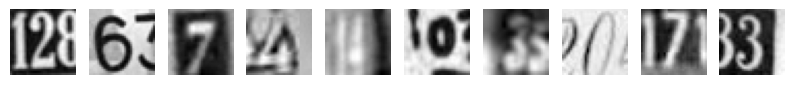

Labels for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [734]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize = (10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i].reshape(32,32), cmap = 'gray')
    plt.axis('off')
plt.show()
print('Labels for each of the above image: %s' %(y_train[0:10]))

# Q  2.2 c - Reshape all the images with appropriate shape update the data in same variable.
 


In [735]:
import numpy as np
import cv2

# Define the new shape for images
new_height = 28
new_width = 28

# Reshape X_train, X_test, and X_val to the new shape
X_train = np.array([cv2.resize(image, (new_width, new_height)) for image in X_train])
X_test = np.array([cv2.resize(image, (new_width, new_height)) for image in X_test])
X_val = np.array([cv2.resize(image, (new_width, new_height)) for image in X_val])


# Q  2.2 d Normalise the images i.e. Normalise the pixel values.
 


In [736]:
# Flatten the images
image_vector_size = 28*28
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Training set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 784) (42000,)
Test set (18000, 784) (18000,)


In [737]:
num_classes = len(set(y_train))
print("Number of Classes in the Dataset:", num_classes)

Number of Classes in the Dataset: 10


# Q 2.2 e Transform Labels into format acceptable by Neural Network
 


In [738]:
# Convert to "one-hot" vectors using the to_categorical function
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes)
y_test_cat=to_categorical(y_test,num_classes)

In [739]:
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# Q  2.2 f - Print total Number of classes in the Dataset.


In [740]:
import numpy as np

# Calculate the total number of classes in the training dataset
num_classes = len(np.unique(y_train))

print("Total Number of Classes in the Dataset:", num_classes)


Total Number of Classes in the Dataset: 2



# Q  2.3 a - Design a Neural Network to train a classifier. 


Definfing the Model

In [741]:
from keras.models import Sequential
from keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Input layer (assuming the input data has been flattened to 1D)
model.add(Dense(128, input_dim=image_vector_size, activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer with 10 units for 10 classes
model.add(Dense(10, activation='softmax'))


# Q  2.3 b - Train the classifier using previously designed Architecture (Use best suitable parameters). 


In [742]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 128)               100480    
                                                                 
 dense_86 (Dense)            (None, 64)                8256      
                                                                 
 dense_87 (Dense)            (None, 32)                2080      
                                                                 
 dense_88 (Dense)            (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [743]:
# Train the classifier
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test_cat), callbacks=[early_stopping])

Epoch 1/50
1313/1313 [==============================] - 6s 4ms/step - loss: 2.1911 - accuracy: 0.1579 - val_loss: 1.9828 - val_accuracy: 0.2556
Epoch 2/50
1313/1313 [==============================] - 5s 4ms/step - loss: 1.7463 - accuracy: 0.3766 - val_loss: 1.4295 - val_accuracy: 0.5291
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 1.3526 - accuracy: 0.5533 - val_loss: 1.2390 - val_accuracy: 0.6063
Epoch 4/50
1313/1313 [==============================] - 5s 4ms/step - loss: 1.1886 - accuracy: 0.6180 - val_loss: 1.1338 - val_accuracy: 0.6373
Epoch 5/50
1313/1313 [==============================] - 5s 4ms/step - loss: 1.1020 - accuracy: 0.6514 - val_loss: 1.1070 - val_accuracy: 0.6472
Epoch 6/50
1313/1313 [==============================] - 5s 4ms/step - loss: 1.0312 - accuracy: 0.6765 - val_loss: 0.9971 - val_accuracy: 0.6892
Epoch 7/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.9897 - accuracy: 0.6906 - val_loss: 1.0568 - val_accuracy:

In [744]:
print(X_train.shape)
print(y_train.shape)

(42000, 784)
(42000, 10)


# Q   2.3 c - Evaluate performance of the model with appropriate metrics.
 


In [745]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Get the class with the highest probability
y_test_labels = np.argmax(y_test_cat, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

563/563 [==============================] - 1s 2ms/step
Accuracy: 0.7817777777777778


In [746]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)


In [747]:
# Check the length of y_test and y_pred_labels
len_y_test = len(y_test)
len_y_pred_labels = len(y_pred_labels)

# Compare the lengths
if len_y_test == len_y_pred_labels:
    print("The lengths of y_test and y_pred_labels match.")
else:
    print("The lengths of y_test and y_pred_labels do not match.")


The lengths of y_test and y_pred_labels match.


In [748]:
import numpy as np

# Check the dimensionality of y_test
if len(y_test.shape) == 1:
    print("y_test is a 1D array.")
else:
    print("y_test is a multi-dimensional array.")


y_test is a 1D array.


# Q Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.


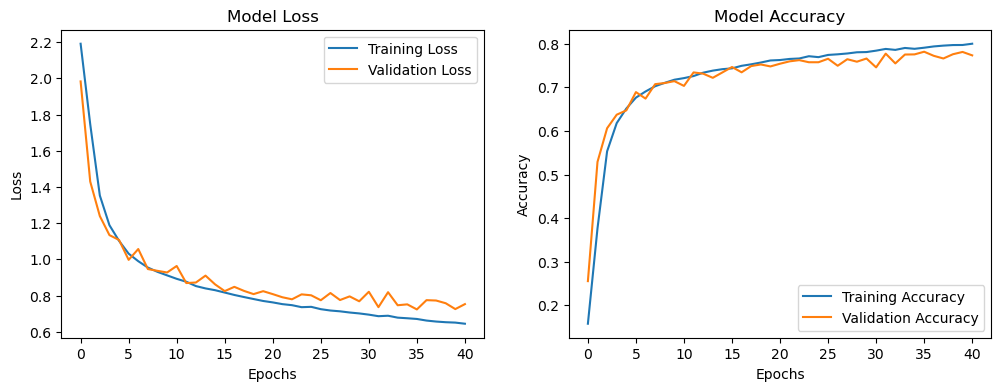

In [749]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Observations from the training and validation loss and accuracy plots can provide insights into the performance of the neural network model:

1. **Training Loss and Validation Loss**:
   - Both training and validation losses decrease initially, which indicates that the model is learning.
   - After a certain point, the training loss continues to decrease, but the validation loss starts to level off or increase slightly. This suggests that the model may be overfitting to the training data. In other words, it's performing well on the training data but not as well on unseen validation data.
   - To mitigate overfitting, techniques such as dropout, regularization, or reducing model complexity may be necessary.

2. **Training Accuracy and Validation Accuracy**:
   - The training accuracy steadily increases, which is expected as the model learns from the training data.
   - The validation accuracy may reach a plateau or start to decrease after a certain number of epochs. This behavior also indicates overfitting, as the model's performance on the validation data is not improving.
   - Strategies to address overfitting include early stopping, data augmentation, or using more training data if available.

3. **Overall Model Performance**:
   - The model's accuracy on both the training and validation data may not be as high as desired, which could indicate that the model architecture or hyperparameters need further tuning.
   - If there is a significant performance gap between training and validation accuracy, it's important to address overfitting to make the model generalize better to unseen data.

In summary, the plots are essential for monitoring the training process and diagnosing potential issues like overfitting. They help us make informed decisions about model architecture, hyperparameters, and regularization techniques to improve the model's performance on unseen data.

# ***The End***